In [1]:
import pandas as pd
from sklearn.feature_extraction import FeatureHasher

In [2]:
dataTrain = pd.read_csv("datosNumericosTrain.csv")
dataTest = pd.read_csv("datosNumericosTest.csv")

In [3]:
dataTrain = dataTrain.drop('Unnamed: 0',1)
dataTest = dataTest.drop('Unnamed: 0',1)

In [4]:
dataTrain['Enero - cantidadEventos'].value_counts()

0     18827
1       282
2       105
3        69
4        34
5        31
6        20
7        12
8        10
11        4
19        3
16        3
14        2
9         2
10        2
13        2
15        2
24        1
21        1
18        1
12        1
Name: Enero - cantidadEventos, dtype: int64

In [5]:
dataTest.head()

,person,Enero_cantEventos,Febrero_cantEventos,Marzo_cantEventos,Abril_cantEventos,Mayo_cantEventos,Enero_checkouts,Febrero_checkouts,Marzo_checkouts,Abril_checkouts,...,Enero_accesos a la homepage,Febrero_accesos a la homepage,Marzo_accesos a la homepage,Abril_accesos a la homepage,Mayo_accesos a la homepage,Enero_listadosVisitados,Febrero_listadosVisitados,Marzo_listadosVisitados,Abril_listadosVisitados,Mayo_listadosVisitados
0,00091926,0,0,0,0,22,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00091a7a,0,0,1,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,000ba417,0,0,0,0,3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0
3,000e4d9e,0,0,0,0,9,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0
4,000e619d,0,0,0,0,4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0


## Probando los labels numericos

In [6]:
#Para el de train
df1 = dataTrain.loc[:, dataTrain.columns.str.contains("Enero")] 
df2 = dataTrain.loc[:, dataTrain.columns.str.contains("Febrero")]
df3 = dataTrain.loc[:, dataTrain.columns.str.contains("Marzo")]
df4 = dataTrain.loc[:, dataTrain.columns.str.contains("Abril")]
df5 = dataTrain.loc[:, dataTrain.columns.str.contains("Mayo")]
labels = dataTrain.loc[:, dataTrain.columns.str.contains("label")]
persons = dataTrain.loc[:, dataTrain.columns.str.contains("person")]
trainSet = pd.concat([persons, df1, df2, df3, df4, df5, labels], axis=1, sort=False)
trainSet.head()

,person,Enero - cantidadEventos,Enero - checkouts,Enero - leads,Enero - conversiones,Enero - staticPageVisitadas,Enero - ProductosVistosPorUser,Enero - productosBuscados,Enero - accesos por marketing online,Enero - searchEngine,...,Mayo - leads,Mayo - conversiones,Mayo - staticPageVisitadas,Mayo - ProductosVistosPorUser,Mayo - productosBuscados,Mayo - accesos por marketing online,Mayo - searchEngine,Mayo - accesos a la homepage,Mayo - listadosVisitados,label
0,0008ed71,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,000c79fe,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
2,001802e4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0019e639,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,8.0,0
4,001b0bf9,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [7]:
#Para el de test
df1 = dataTest.loc[:, dataTest.columns.str.contains("Enero")] 
df2 = dataTest.loc[:, dataTest.columns.str.contains("Febrero")]
df3 = dataTest.loc[:, dataTest.columns.str.contains("Marzo")]
df4 = dataTest.loc[:, dataTest.columns.str.contains("Abril")]
df5 = dataTest.loc[:, dataTest.columns.str.contains("Mayo")]
persons = dataTest.loc[:, dataTest.columns.str.contains("person")]
testSet = pd.concat([persons, df1, df2, df3, df4, df5], axis=1, sort=False)
testSet.head()

,person,Enero_cantEventos,Enero_checkouts,Enero_leads,Enero_conversiones,Enero_staticPageVisitadas,Enero_ProductosVistosPorUser,Enero_productosBuscados,Enero_accesos por marketing online,Enero_searchEngine,...,Mayo_checkouts,Mayo_leads,Mayo_conversiones,Mayo_staticPageVisitadas,Mayo_ProductosVistosPorUser,Mayo_productosBuscados,Mayo_accesos por marketing online,Mayo_searchEngine,Mayo_accesos a la homepage,Mayo_listadosVisitados
0,00091926,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00091a7a,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,000ba417,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0
3,000e4d9e,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0
4,000e619d,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,2.0


In [8]:
testSet.to_csv('testSet.csv', index=False)

In [9]:
X = trainSet.iloc[:,1:]
X = X.iloc[:,:-1].values
y = trainSet['label'].values


In [10]:
T = testSet.iloc[:,1:].values

#### Encoding de person

### KNN

In [11]:
print T.shape
print X.shape
y.shape
X[:]

(19415L, 55L)
(19414L, 55L)


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  2.,  1.,  4.],
       [ 0.,  0.,  0., ...,  1.,  3.,  0.],
       [ 0.,  0.,  0., ...,  1.,  1.,  0.]])

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
#Spliteo con shuffle=False es decir ordenado
X_train, X_test, y_train, y_test = train_test_split(\
 X, y, test_size=0.05,shuffle = False)

In [13]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=7)
# Entrenar( esto hace nada en KNN normal)
knn.fit(X_train, y_train)
# predecir la respuesta
pred = knn.predict(X_test)
# evaluar la exactitud
print("Precision del modelo")
print(accuracy_score(y_test, pred))

D:\Anaconda2\envs\py2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Precision del modelo
0.954685890834


In [14]:
predsss = knn.predict(T)
print("Prediccion")
predsss.mean()

Prediccion


0.0031934071594128251

### XGBoost

In [15]:
# Fitting XGBoost to the Training set
import xgboost
classifier = xgboost.XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [16]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [17]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [18]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

0.94832721351395999

In [19]:
# Predicting the Test set results
predFinalXGboost = classifier.predict(T)

In [20]:
predFinalXGboost.mean()

0.0020602626834921455

## Linear Regression

#### Visualizacion de datos sin muestrear


In [21]:
import matplotlib.pyplot as plt

trainSet['label'].value_counts().plot(kind= 'bar')

#### SubMuestreo o undersample

In [22]:
trainSet.head()

,person,Enero - cantidadEventos,Enero - checkouts,Enero - leads,Enero - conversiones,Enero - staticPageVisitadas,Enero - ProductosVistosPorUser,Enero - productosBuscados,Enero - accesos por marketing online,Enero - searchEngine,...,Mayo - leads,Mayo - conversiones,Mayo - staticPageVisitadas,Mayo - ProductosVistosPorUser,Mayo - productosBuscados,Mayo - accesos por marketing online,Mayo - searchEngine,Mayo - accesos a la homepage,Mayo - listadosVisitados,label
0,0008ed71,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,000c79fe,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
2,001802e4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0019e639,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,8.0,0
4,001b0bf9,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [23]:
#COMO HABIAMOS HECHO ANTERIORMENTE FH, DEJE LA MISMA NOMENCLATURA, POR LO QUE OBTENGO EL DF NUEVAMENTE
nuevoX1=trainSet.iloc[:,:]
print nuevoX1.shape
nuevoX1.head(50)

(19414, 57)


,person,Enero - cantidadEventos,Enero - checkouts,Enero - leads,Enero - conversiones,Enero - staticPageVisitadas,Enero - ProductosVistosPorUser,Enero - productosBuscados,Enero - accesos por marketing online,Enero - searchEngine,...,Mayo - leads,Mayo - conversiones,Mayo - staticPageVisitadas,Mayo - ProductosVistosPorUser,Mayo - productosBuscados,Mayo - accesos por marketing online,Mayo - searchEngine,Mayo - accesos a la homepage,Mayo - listadosVisitados,label
0,0008ed71,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,000c79fe,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
2,001802e4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0019e639,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,8.0,0
4,001b0bf9,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,001ca5ee,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,4.0,0
6,001dfc31,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
7,001e9aea,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,0020152e,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,002b0188,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0


In [24]:
#1.Encuentra el número de muestras que son conversiones
sizeConversiones = len(nuevoX1[nuevoX1['label'] == 1])
sizeConversiones

980

In [25]:
#2. Obtener índices de muestras de no conversiones.
no_conversiones_indices = nuevoX1[nuevoX1.label == 0].index 

In [26]:
#Muestras aleatorias de índices de no conversiones.
#GENERO SEMILLA CON 3 PORQUE SI, EN REALIDAD PORQUE BRINDA UN NUMERO BAJO COMO 46
np.random.seed(3)
random_indices_no_conversiones = np.random.choice(no_conversiones_indices,sizeConversiones, replace=False)
random_indices_no_conversiones=random_indices_no_conversiones
random_indices_no_conversiones[:10]

array([   46,  8778, 14191,  9770, 10971, 18617, 16645, 16070, 14830,  5436], dtype=int64)

In [27]:
#4. Encuentra los índices de muestras de conversiones.
conversiones = nuevoX1[nuevoX1.label == 1].index

In [28]:
#5. Índices de conversiones concat con muestras de no conversiones.
under_sample_indices = np.concatenate([conversiones,random_indices_no_conversiones])

In [29]:
#6 Obtener Balance Dataframe
under_sample = nuevoX1.loc[under_sample_indices]

In [30]:
under_sample = under_sample.sort_values(by='person')

#### Visualización de datos submuestreados

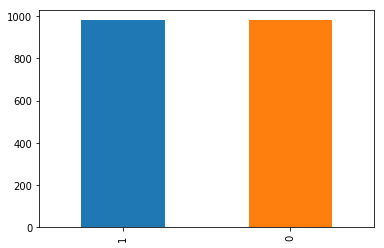

In [31]:
under_sample['label'].value_counts().plot(kind='bar')

### Ejecución de regresión logística en datos submuestreados

In [32]:
#VERIFICO EL INDICE 46=00c40a4b
print under_sample.shape
under_sample.to_csv('under_sample.csv', index=False)
under_sample.head(10)

(1960, 57)


,person,Enero - cantidadEventos,Enero - checkouts,Enero - leads,Enero - conversiones,Enero - staticPageVisitadas,Enero - ProductosVistosPorUser,Enero - productosBuscados,Enero - accesos por marketing online,Enero - searchEngine,...,Mayo - leads,Mayo - conversiones,Mayo - staticPageVisitadas,Mayo - ProductosVistosPorUser,Mayo - productosBuscados,Mayo - accesos por marketing online,Mayo - searchEngine,Mayo - accesos a la homepage,Mayo - listadosVisitados,label
13,003476c0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
16,003bdb4d,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
17,003d4cac,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
18,003dd965,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1
19,0042421c,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
25,006671fd,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
28,007537e8,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
35,009cbfb2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
46,00c40a4b,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0
47,00c955ce,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,13.0,0.0,0.0,0.0,0.0,0.0,0


In [33]:
#QUITO LA COLUMNA LABEL Y PERSON

X_under = under_sample.iloc[:,:-1]
X_under = X_under.iloc[:,1:]

X_under.head()

,Enero - cantidadEventos,Enero - checkouts,Enero - leads,Enero - conversiones,Enero - staticPageVisitadas,Enero - ProductosVistosPorUser,Enero - productosBuscados,Enero - accesos por marketing online,Enero - searchEngine,Enero - accesos a la homepage,...,Mayo - checkouts,Mayo - leads,Mayo - conversiones,Mayo - staticPageVisitadas,Mayo - ProductosVistosPorUser,Mayo - productosBuscados,Mayo - accesos por marketing online,Mayo - searchEngine,Mayo - accesos a la homepage,Mayo - listadosVisitados
13,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
17,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
19,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
#APLICO LOG+1 PARA SALVAR LOS 0 Y NO DE NaN SOBRE EL DF
X_under=np.log(X_under+1)
print X_under.shape
X_under.head()

(1960, 55)


,Enero - cantidadEventos,Enero - checkouts,Enero - leads,Enero - conversiones,Enero - staticPageVisitadas,Enero - ProductosVistosPorUser,Enero - productosBuscados,Enero - accesos por marketing online,Enero - searchEngine,Enero - accesos a la homepage,...,Mayo - checkouts,Mayo - leads,Mayo - conversiones,Mayo - staticPageVisitadas,Mayo - ProductosVistosPorUser,Mayo - productosBuscados,Mayo - accesos por marketing online,Mayo - searchEngine,Mayo - accesos a la homepage,Mayo - listadosVisitados
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.000000,0.000000
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.693147,0.000000
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.693147,0.693147
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [35]:
#NORMALIZO EL DF Y VERIFICO QUE NO HAYA NaN
from sklearn import preprocessing

# Get column names first
names = X_under.columns

# Create the Scaler object
scaler = preprocessing.StandardScaler()

# Fit your data on the scaler object
scaled_df = scaler.fit_transform(X_under)
scaled_df = pd.DataFrame(scaled_df, columns=names)
print scaled_df.shape
X_under=scaled_df
scaled_df.head()
X_under.isnull().values.any()

(1960, 55)


False

In [36]:
X_under.head()

,Enero - cantidadEventos,Enero - checkouts,Enero - leads,Enero - conversiones,Enero - staticPageVisitadas,Enero - ProductosVistosPorUser,Enero - productosBuscados,Enero - accesos por marketing online,Enero - searchEngine,Enero - accesos a la homepage,...,Mayo - checkouts,Mayo - leads,Mayo - conversiones,Mayo - staticPageVisitadas,Mayo - ProductosVistosPorUser,Mayo - productosBuscados,Mayo - accesos por marketing online,Mayo - searchEngine,Mayo - accesos a la homepage,Mayo - listadosVisitados
0,-0.224606,-0.122468,-0.03196,0.0,-0.06981,-0.096353,-0.070083,-0.074372,-0.184929,-0.174625,...,-1.079574,-0.077565,-0.068962,-0.288466,-0.32765,-0.224743,-0.235422,0.208686,-0.866207,-0.736821
1,-0.224606,-0.122468,-0.03196,0.0,-0.06981,-0.096353,-0.070083,-0.074372,-0.184929,-0.174625,...,0.488571,-0.077565,-0.068962,-0.288466,-0.32765,-0.224743,-0.235422,0.208686,0.194176,-0.736821
2,-0.224606,-0.122468,-0.03196,0.0,-0.06981,-0.096353,-0.070083,-0.074372,-0.184929,-0.174625,...,-1.079574,-0.077565,-0.068962,-0.288466,-0.32765,-0.224743,-0.235422,-1.066898,-0.866207,-0.736821
3,-0.224606,-0.122468,-0.03196,0.0,-0.06981,-0.096353,-0.070083,-0.074372,-0.184929,-0.174625,...,-1.079574,-0.077565,-0.068962,-0.288466,-0.32765,-0.224743,-0.235422,0.208686,0.194176,0.459011
4,-0.224606,-0.122468,-0.03196,0.0,-0.06981,-0.096353,-0.070083,-0.074372,-0.184929,-0.174625,...,-1.079574,-0.077565,-0.068962,-0.288466,-0.32765,-0.224743,-0.235422,-1.066898,-0.866207,-0.736821


In [37]:
#PREPARO X_under PARA EL ALGORITMO TOMANDO LOS values
X_under = X_under.values
y_under = under_sample['label'].values
X_under.shape
X_under

array([[-0.22460564, -0.12246839, -0.03196014, ...,  0.20868612,
        -0.86620685, -0.73682103],
       [-0.22460564, -0.12246839, -0.03196014, ...,  0.20868612,
         0.19417645, -0.73682103],
       [-0.22460564, -0.12246839, -0.03196014, ..., -1.06689825,
        -0.86620685, -0.73682103],
       ..., 
       [-0.22460564, -0.12246839, -0.03196014, ...,  0.20868612,
         1.59592691,  1.65484292],
       [-0.22460564, -0.12246839, -0.03196014, ...,  0.20868612,
        -0.86620685, -0.73682103],
       [-0.22460564, -0.12246839, -0.03196014, ...,  1.4842705 ,
         1.25455974,  0.45901094]])

In [38]:
#LE QUITO A T LA COLUMNA PERSON
T = testSet.iloc[:,1:]
T.head()

,Enero_cantEventos,Enero_checkouts,Enero_leads,Enero_conversiones,Enero_staticPageVisitadas,Enero_ProductosVistosPorUser,Enero_productosBuscados,Enero_accesos por marketing online,Enero_searchEngine,Enero_accesos a la homepage,...,Mayo_checkouts,Mayo_leads,Mayo_conversiones,Mayo_staticPageVisitadas,Mayo_ProductosVistosPorUser,Mayo_productosBuscados,Mayo_accesos por marketing online,Mayo_searchEngine,Mayo_accesos a la homepage,Mayo_listadosVisitados
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,2.0


In [39]:
#APLICO LOG A T
T=np.log(T+1)
T.head()

,Enero_cantEventos,Enero_checkouts,Enero_leads,Enero_conversiones,Enero_staticPageVisitadas,Enero_ProductosVistosPorUser,Enero_productosBuscados,Enero_accesos por marketing online,Enero_searchEngine,Enero_accesos a la homepage,...,Mayo_checkouts,Mayo_leads,Mayo_conversiones,Mayo_staticPageVisitadas,Mayo_ProductosVistosPorUser,Mayo_productosBuscados,Mayo_accesos por marketing online,Mayo_searchEngine,Mayo_accesos a la homepage,Mayo_listadosVisitados
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.098612,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.386294,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,1.386294,1.386294
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,1.386294,0.693147,1.609438
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,1.098612,1.609438,1.098612


In [40]:
#ESTANDARIZO T Y VERIFICO QUE NO HAYA NaN
from sklearn import preprocessing

# Get column names first
names = T.columns

# Create the Scaler object
scaler = preprocessing.StandardScaler()

# Fit your data on the scaler object
scaled_df = scaler.fit_transform(T)
scaled_df = pd.DataFrame(scaled_df, columns=names)
print scaled_df.shape
T=scaled_df
scaled_df.head()
scaled_df.isnull().values.any()

(19415, 55)


False

In [41]:
T=T.values

In [42]:
T

array([[-0.16623433, -0.09216354, -0.03724391, ..., -1.05802936,
        -0.82328992, -0.66728891],
       [-0.16623433, -0.09216354, -0.03724391, ..., -1.05802936,
        -0.82328992, -0.66728891],
       [-0.16623433, -0.09216354, -0.03724391, ...,  0.28814649,
         1.49622269,  1.99208762],
       ..., 
       [-0.16623433, -0.09216354, -0.03724391, ...,  0.28814649,
        -0.82328992, -0.66728891],
       [-0.16623433, -0.09216354, -0.03724391, ...,  2.72116404,
         2.17463663, -0.66728891],
       [-0.16623433, -0.09216354, -0.03724391, ...,  0.28814649,
        -0.82328992,  0.66239936]])

In [43]:
T.shape

(19415L, 55L)

In [44]:
import numpy as np
from sklearn.model_selection import train_test_split
#Spliteo con shuffle=False es decir ordenado
X_under_train, X_under_test, y_under_train, y_under_test =\
train_test_split(X_under,y_under,test_size = 0.4,shuffle = False)

In [45]:
print ("X_under_train",X_under_train.shape)
print ("y_under_train",y_under_train.shape)
print ("X_under_test",X_under_test.shape)
print ("y_under_test",y_under_test.shape)
print ("T",T.shape)

('X_under_train', (1176L, 55L))
('y_under_train', (1176L,))
('X_under_test', (784L, 55L))
('y_under_test', (784L,))
('T', (19415L, 55L))


In [46]:
from sklearn.linear_model import LogisticRegression
lr_under = LogisticRegression()
lr_under.fit(X_under_train,y_under_train)
y_under_pred = lr_under.predict(X_under_test)

In [57]:
from sklearn.metrics import recall_score
print(recall_score(y_under_test,y_under_pred))
print(accuracy_score(y_under_test,y_under_pred))

0.757180156658
0.75637755102


In [48]:
T_predict=lr_under.predict(T)

In [49]:
pd.Series(T_predict).value_counts()

0    12273
1     7142
dtype: int64

In [50]:
T_predict.mean()

0.36785990213752251

In [51]:
T_predict[:15]

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [52]:
T_predict_proba=lr_under.predict_proba(T)[:,1]

In [53]:
T_predict_proba

array([ 0.1034764 ,  0.73783068,  0.18769346, ...,  0.81291002,
        0.5559404 ,  0.34931957])

In [54]:
T_predict_proba.mean()

0.49463956744014093

In [55]:
T_predicciones=pd.DataFrame({'person':testSet.iloc[:,0]})
T_predicciones['label']=T_predict_proba
T_predicciones.head()

,person,label
0,00091926,0.103476
1,00091a7a,0.737831
2,000ba417,0.187693
3,000e4d9e,0.610464
4,000e619d,0.724253


In [56]:
T_predicciones.to_csv('sub.csv', index=False)